In [1]:

from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from spacy.lang.en import English
from keras.preprocessing.text import text_to_word_sequence
from gensim.utils import tokenize
import pandas as pd
from matplotlib import pyplot as plt
from nltk import pos_tag
import seaborn as sns
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:

text = ("I recently had an exceptional experience with the customer service team at XYZ Company. I "
"had an issue with a product I purchased, and their support team went above and beyond to "
"assist me. Their response was prompt and courteous, and they resolved my problem quickly "
"and efficiently. The agent I interacted with was knowledgeable, patient, and genuinely seemed "
"to care about resolving my issue. It's rare to encounter such top-notch customer service these "
"days, and I was truly impressed with their professionalism and dedication. I highly recommend "
"XYZ Company's customer service to anyone in need of assistance.")
text = text.lower()

## Tokenization

### Going to create a dict to hold the corpus' for analysis later on

In [3]:
all_corpus = {'simple_split_corpus':[],'NLTK_word_corpus':[],'NLTK_word_punc_corpus':[],'spacey_corpus':[],'keras_corpus':[],'gensim_corpus':[]}

### Simple tokenization with .split

In [4]:
all_corpus['simple_split_corpus'] = text.split(" ") #Splits the text on each space in the

### Tokenization by word in NLTK

In [5]:
all_corpus['NLTK_word_corpus'] = word_tokenize(text)

### Tokenization by words and punctuation in NLTK

In [6]:
all_corpus['NLTK_word_punc_corpus'] = wordpunct_tokenize(text)

### Tokenization by sentence in NLTK

In [7]:
# all_corpus['sentence_corpus'] = sent_tokenize(text)

### Specific Spacey Tokenization 

In [8]:
nlp = English()
my_doc = nlp(text)
for token in my_doc:
    all_corpus['spacey_corpus'].append(token.text)

### Specific Keras Tokenization 

In [9]:
all_corpus['keras_corpus'] = text_to_word_sequence(text)

### Specific Gensim Tokenization 

In [10]:
all_corpus['gensim_corpus'] = list(tokenize(text))

## Taking a look at each corpus

In [11]:
for name,corpus in all_corpus.items():
    print(F'The {name} has:\n')
    print(F'\tCharacters: {len(corpus)}\n')

The simple_split_corpus has:

	Characters: 98

The NLTK_word_corpus has:

	Characters: 111

The NLTK_word_punc_corpus has:

	Characters: 115

The spacey_corpus has:

	Characters: 113

The keras_corpus has:

	Characters: 99

The gensim_corpus has:

	Characters: 101



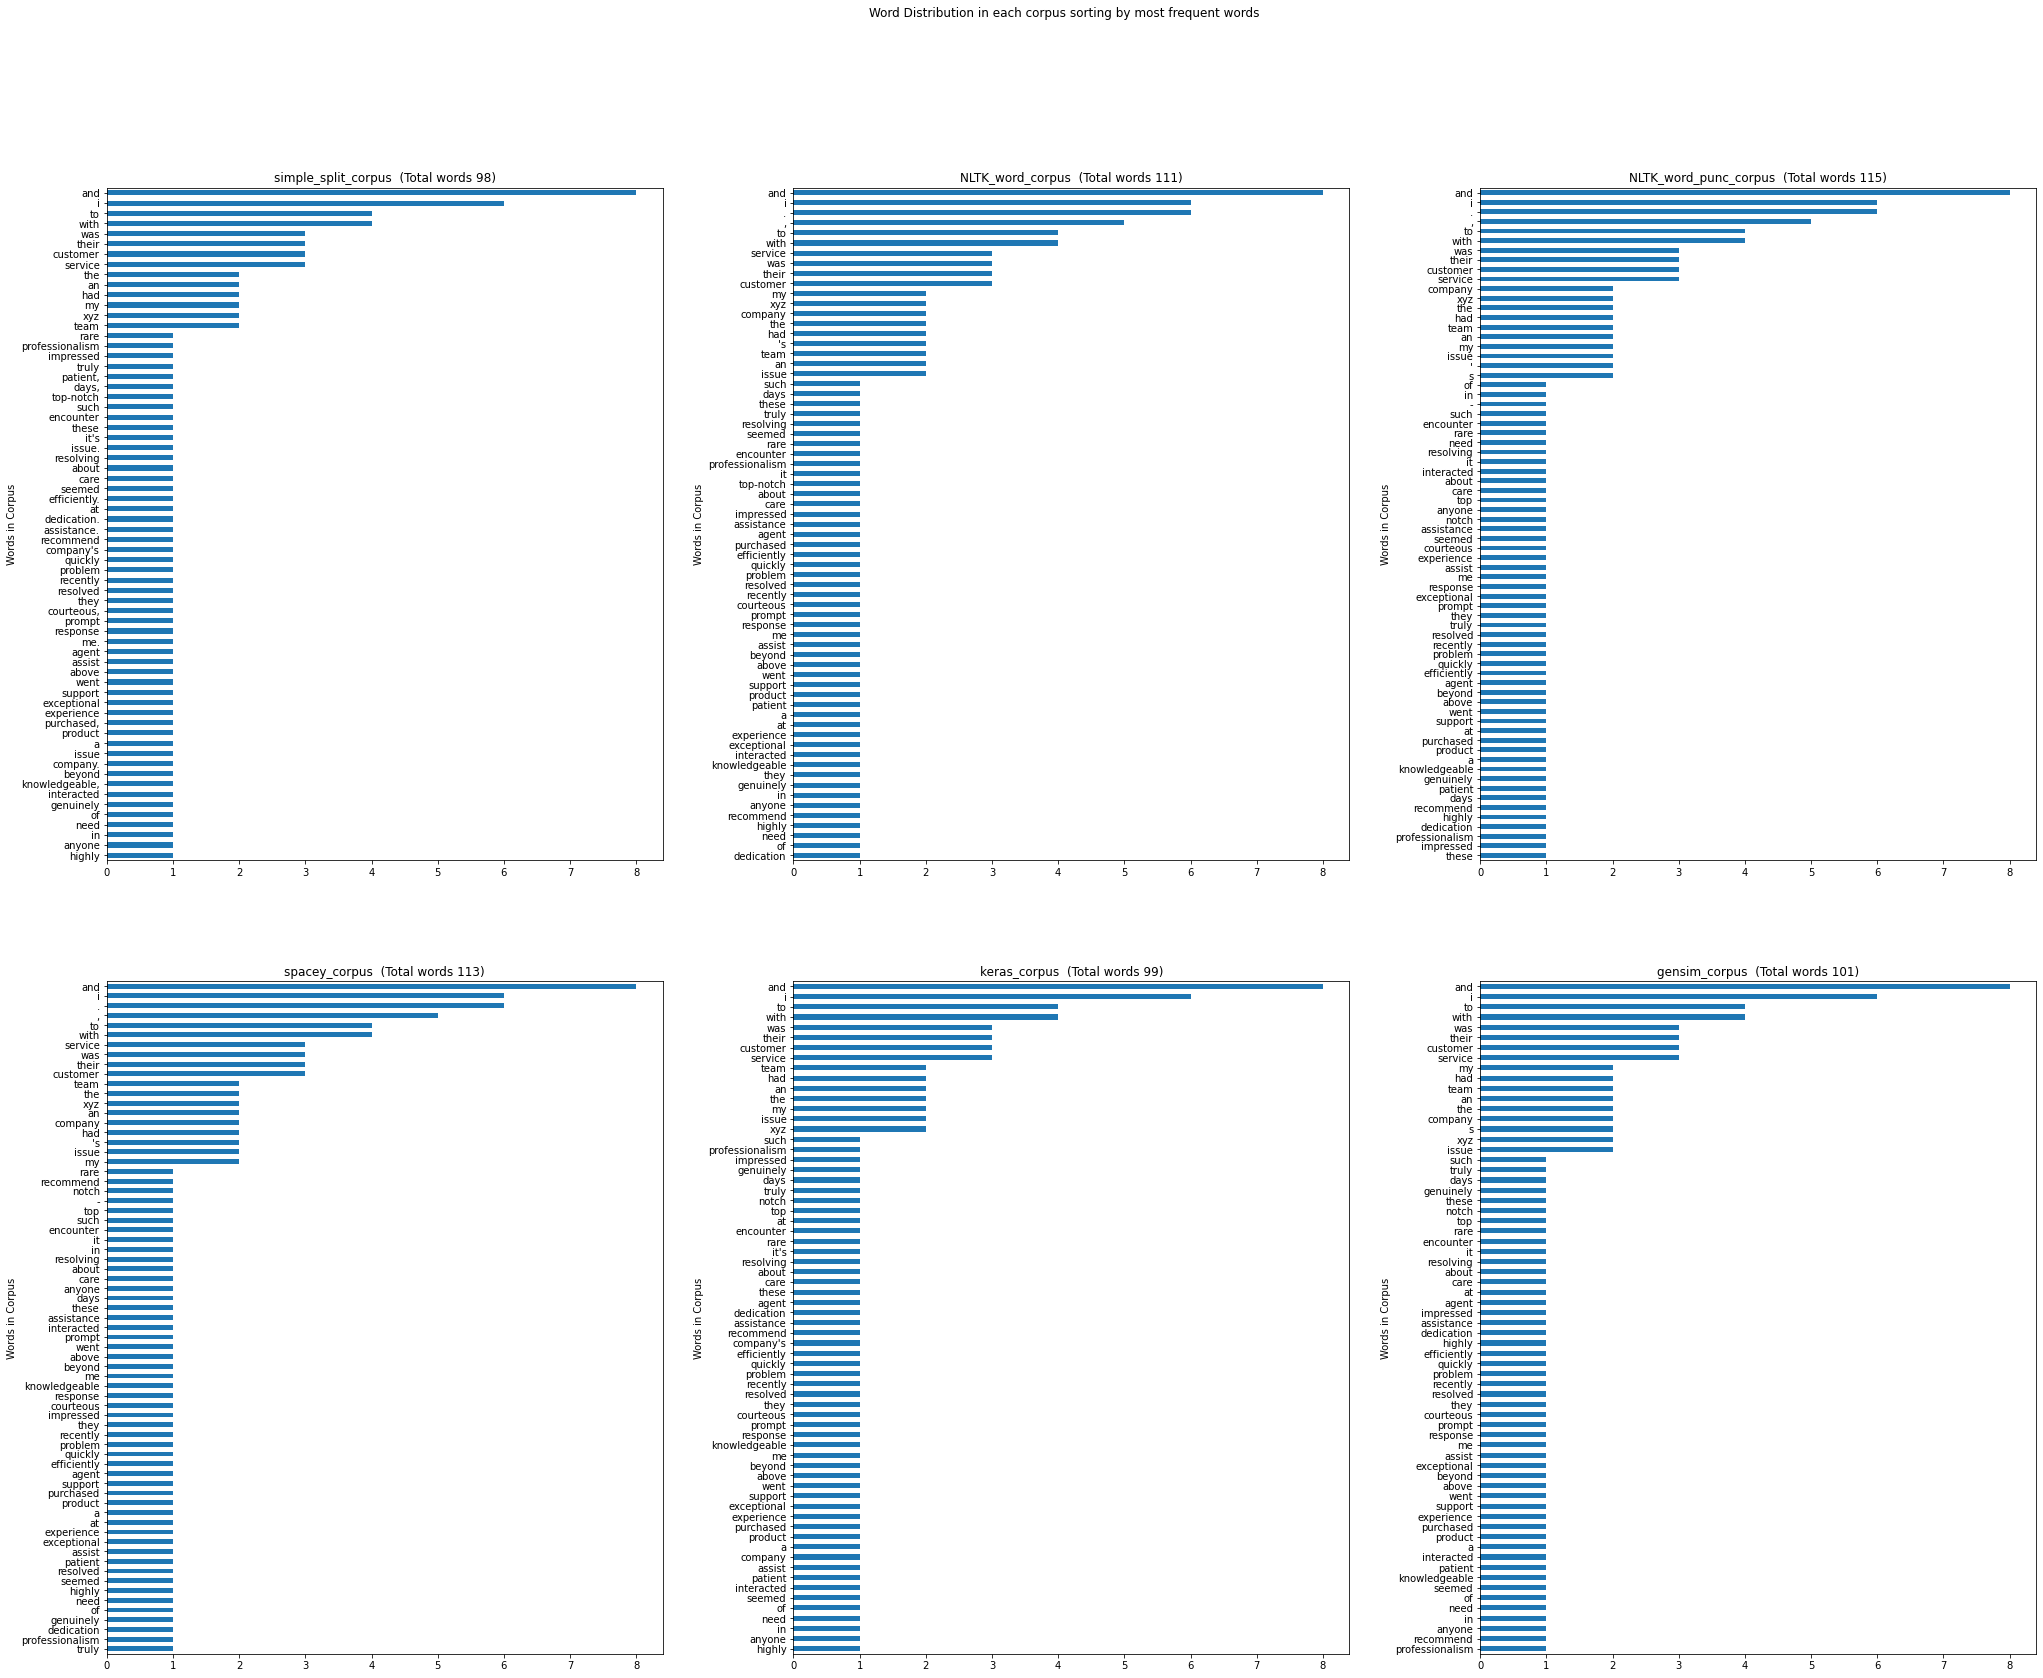

In [12]:
plt.rcParams["figure.figsize"] = [30, 25]
fig, axis = plt.subplots(2, 3)
fig.suptitle('Word Distribution in each corpus sorting by most frequent words')
plt.tight_layout(pad=10)

for i,corpus in enumerate(all_corpus.items()):
    # print(F'The {name} has the foll:\n')
    # print(pd.Series(corpus[1]).sort_values())
    pd.Series(corpus[1]).value_counts().sort_values(ascending=True).plot(kind = 'barh',ax=axis[i//3,i%3],title=F'{corpus[0]}  (Total words {len(corpus[1])})',ylabel=F"Words in Corpus")


In [13]:
# plt.rcParams["figure.figsize"] = [30, 25]
# fig, axis = plt.subplots(2, 3)
# fig.suptitle('Word Distribution in each corpus sorting by alphabetical order')
# plt.tight_layout(pad=10)

# for i,corpus in enumerate(all_corpus.items()):
#     # print(F'The {name} has the foll:\n')
#     print(pd.DataFrame(corpus[1]).value_counts().sort_index())
#     # pd.Series(corpus[1],columns=['Words']).value_counts().so.plot(kind = 'barh',ax=axis[i//3,i%3],title=F'{corpus[0]}  (Total words {len(corpus[1])})',ylabel=F"Words in Corpus")


#### Observing the different corpus' shows that they generally differ according to whether punctuation was included or not and how it dealt with apostrophes.

TODO: Bigram and Trigram tokenization

## Sentence Segmentation

In [14]:
sentence_corpus = sent_tokenize(text)
sentence_corpus

['i recently had an exceptional experience with the customer service team at xyz company.',
 'i had an issue with a product i purchased, and their support team went above and beyond to assist me.',
 'their response was prompt and courteous, and they resolved my problem quickly and efficiently.',
 'the agent i interacted with was knowledgeable, patient, and genuinely seemed to care about resolving my issue.',
 "it's rare to encounter such top-notch customer service these days, and i was truly impressed with their professionalism and dedication.",
 "i highly recommend xyz company's customer service to anyone in need of assistance."]

## Part-of-Speech Tagging

#### To do the Part-of-Speech Tagging I am going to be using the spacey and Keras corpus as one includes punctuation while the other includes only the words, to ensure we capture any variation between different token sets.

In [15]:
pos_spacey = pos_tag(all_corpus['spacey_corpus'])
pos_keras = pos_tag(all_corpus['keras_corpus'])

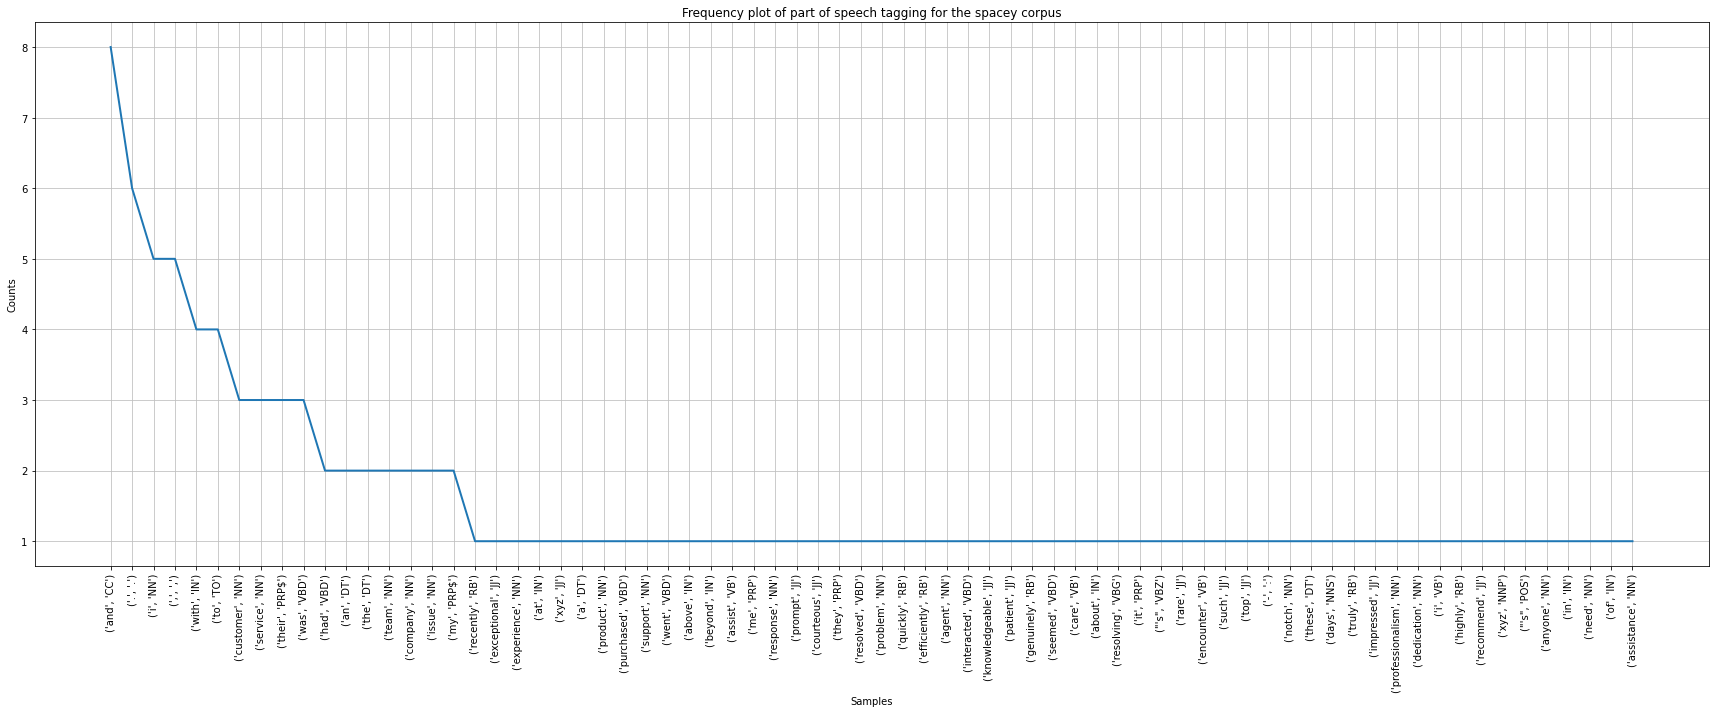

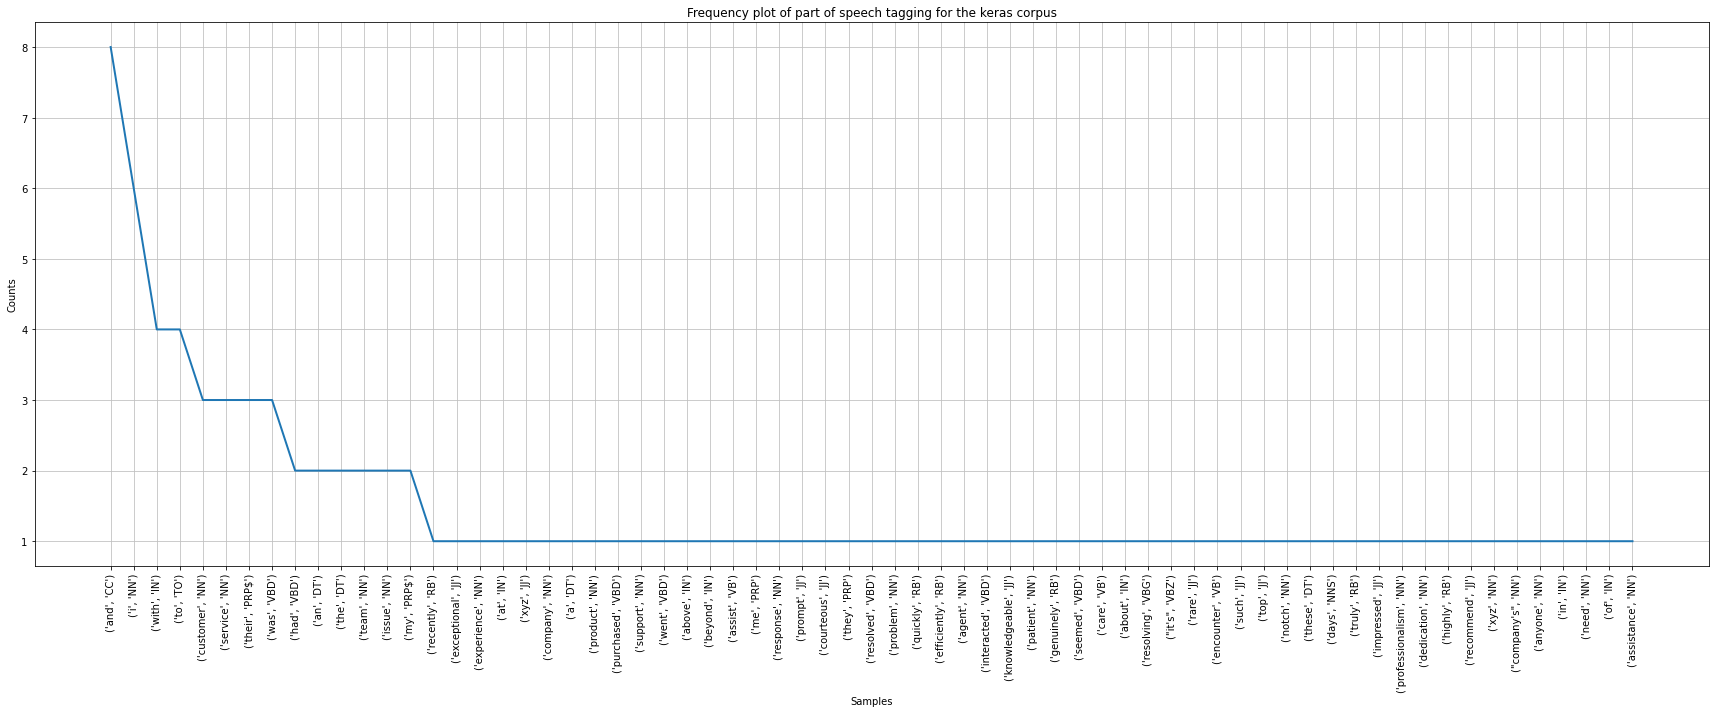

<AxesSubplot:title={'center':'Frequency plot of part of speech tagging for the keras corpus'}, xlabel='Samples', ylabel='Counts'>

In [16]:
plt.rcParams["figure.figsize"] = [30, 10]
spacey_fd = nltk.FreqDist(pos_spacey)
spacey_fd.plot(title="Frequency plot of part of speech tagging for the spacey corpus")
plt.show()
keras_fd = nltk.FreqDist(pos_keras)
keras_fd.plot(title="Frequency plot of part of speech tagging for the keras corpus")

In [17]:
pos_dict = {}
for item in pos_keras:
    pos_dict[item[1]] = pos_dict.get(item[1],0) + 1


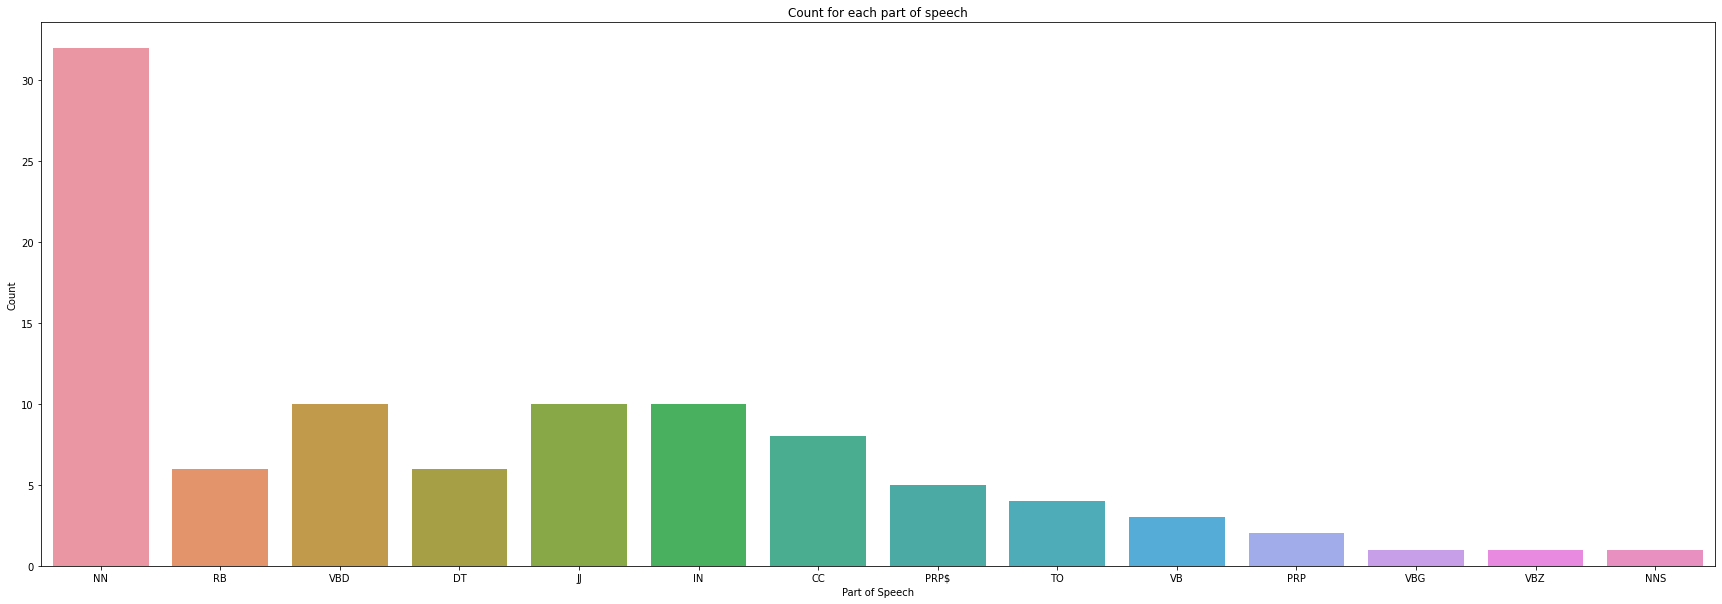

In [18]:
sns.barplot(x = list(pos_dict.keys()), y = list(pos_dict.values()))
plt.xlabel("Part of Speech")
plt.ylabel("Count")
plt.title("Count for each part of speech")
plt.show()

### Analysing the parts of speech making up this text , I notice there are a majority of nouns(NN)followed by a lot of verb past tense(VBD), Adjectives(JJ) and preposition/subordinating conjunction(IN)